# Dataset- Dados Bovespa

<p>
Abaixo podemos encontrar uma dataset com os principais com os dados de cotação diária do indice do Ibovespa dos últimos 5 anos, tendo inicio em 01 de janeiro de 2018 até 31 de dezembro 2022.
</p>
</br>
<p>
O indice do Ibovespa é dado com base nas movimentaçãoes das açoes listadas na carteira, em suma essa composição pode variar. Hoje ela é composta por 120 ações
ordinárias e preferenciais. <b>Para mais informações acesse o site:</b>
<a href='https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm'>Site Ibovespa</a>
</p>

# Imports

In [618]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Leitura

In [619]:
df_bovespa = pd.read_csv('Dados Históricos - Ibovespa.csv', sep=',')
df_bovespa.head(4)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,28.07.2023,120.187,120.002,120.660,119.706,"8,46M","0,16%"
1,27.07.2023,119.990,122.560,122.599,119.825,"10,68M","-2,10%"
2,26.07.2023,122.560,122.003,122.747,121.370,"9,99M","0,45%"
3,25.07.2023,122.008,121.344,123.010,121.344,"11,43M","0,55%"


# Conversão dos dados

Para a obtenção do melhor resultado dos dados, precisamos trabalhar com os tipos de dados, abaixo serão feitas alterações em cima dos valore de Data, Volume e Variação

In [620]:
df_bovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1383 non-null   object 
 1   Último    1383 non-null   float64
 2   Abertura  1383 non-null   float64
 3   Máxima    1383 non-null   float64
 4   Mínima    1383 non-null   float64
 5   Vol.      1383 non-null   object 
 6   Var%      1383 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.8+ KB


In [621]:
df_bovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

In [622]:
df_bovespa.Data = pd.to_datetime(df_bovespa.Data, dayfirst=True)
df_bovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1383 non-null   datetime64[ns]
 1   Último    1383 non-null   float64       
 2   Abertura  1383 non-null   float64       
 3   Máxima    1383 non-null   float64       
 4   Mínima    1383 non-null   float64       
 5   Vol.      1383 non-null   object        
 6   Var%      1383 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.8+ KB


In [623]:
df_bovespa.shape

(1383, 7)

In [624]:
def alter_value_volume(volume):
  if 'M' in volume:
    volume = volume.replace('M', '')
    volume = float(volume.replace(',','.'))
    return volume * 1_000_000
  elif 'K' in volume:
    volume = volume.replace('K', '')
    volume = float(volume.replace(',','.'))
    return volume * 1_000

In [625]:
df_bovespa['Vol.'] = df_bovespa['Vol.'].apply(alter_value_volume)

# series_volume = series_volume.str.replace(',','.')
# series_volume = pd.to_numeric(series_volume)
# series_volume

In [626]:
df_bovespa['Vol.']

0        8460000.0
1       10680000.0
2        9990000.0
3       11430000.0
4       10490000.0
           ...    
1378     2630000.0
1379     2830000.0
1380     3590000.0
1381     3240000.0
1382     2970000.0
Name: Vol., Length: 1383, dtype: float64

In [627]:
def convert_porcentagem(variacao):
  if '%' in variacao:
    variacao = variacao.replace('%', '')
    variacao = float(variacao.replace(',', '.'))
    return variacao

In [628]:
df_bovespa['Var%'] = df_bovespa['Var%'].apply(convert_porcentagem)
df_bovespa['Var%']

0       0.16
1      -2.10
2       0.45
3       0.55
4       0.94
        ... 
1378    0.39
1379    0.54
1380    0.84
1381    0.13
1382    1.95
Name: Var%, Length: 1383, dtype: float64

# Conhecendo os dados

In [629]:
df_bovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1383 non-null   datetime64[ns]
 1   Último    1383 non-null   float64       
 2   Abertura  1383 non-null   float64       
 3   Máxima    1383 non-null   float64       
 4   Mínima    1383 non-null   float64       
 5   Vol.      1383 non-null   float64       
 6   Var%      1383 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 75.8 KB


In [630]:
df_bovespa.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Último,1383.0,102.42,13.99,63.57,94.41,104.30,112.90,130.78
Abertura,1383.0,102.39,14.00,63.60,94.40,104.29,112.89,130.78
Máxima,1383.0,103.39,13.94,67.60,95.49,105.12,114.06,131.19
Mínima,1383.0,101.40,14.03,61.69,93.54,103.41,111.82,129.53
Vol.,1383.0,8788217.15,4131249.22,424320.00,4950000.00,8830000.00,11685000.00,26030000.00
Var%,1383.0,0.05,1.66,-14.78,-0.78,0.08,0.94,13.91


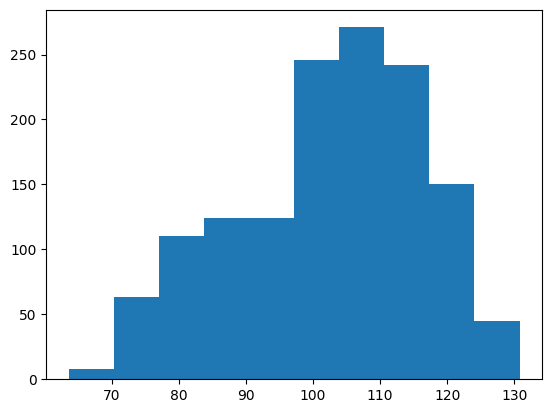

In [631]:
plt.hist(df_bovespa['Abertura'])
plt.show()

<ipython-input-632-e1fd4584953d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bovespa_corr = df_bovespa.corr().round(2)


<Axes: >

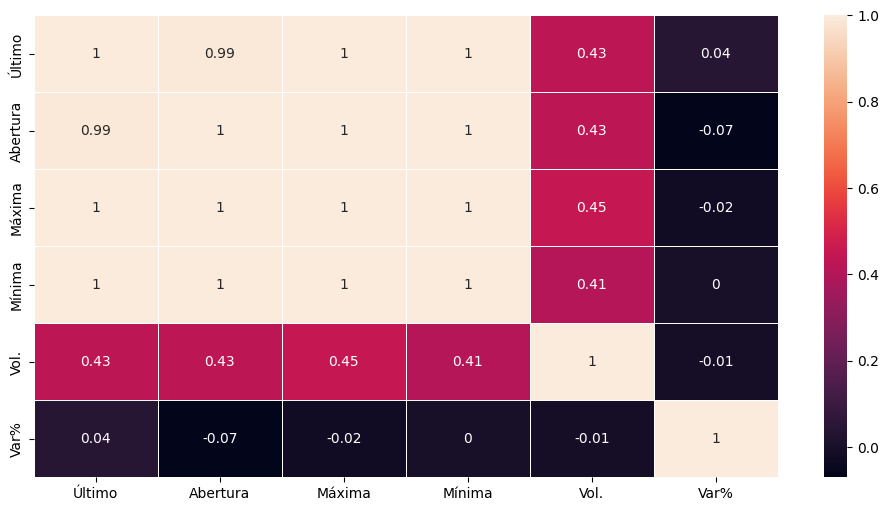

In [632]:
bovespa_corr = df_bovespa.corr().round(2)
fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(data=bovespa_corr, annot=True, linewidths=0.5, ax=ax)

<Axes: xlabel='Máxima', ylabel='Mínima'>

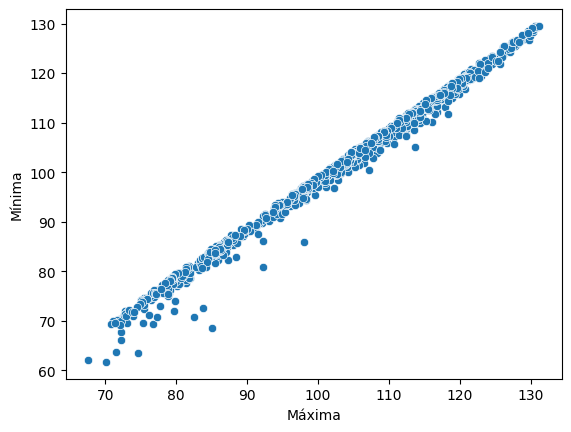

In [633]:
sns.scatterplot(data=df_bovespa, x ='Máxima', y='Mínima')

# Adicionando variavel categorica

In [634]:
for item in df_bovespa['Data']:
  print(item.weekday())
  break

4


In [635]:
def get_weekday(date):
  return date.weekday()

In [636]:
series_dia_semana = df_bovespa['Data'].apply(get_weekday)
series_dia_semana

0       4
1       3
2       2
3       1
4       0
       ..
1378    0
1379    4
1380    3
1381    2
1382    1
Name: Data, Length: 1383, dtype: int64

In [637]:
df_bovespa['dia_semana'] = series_dia_semana

# Analise da bolsa

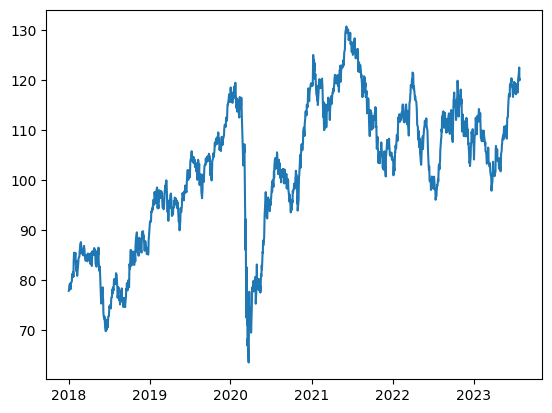

In [638]:
# Desempenho da bolsa nos últimos anos
fig, ax = plt.subplots()

ax.plot(df_bovespa['Data'], df_bovespa['Último'])

In [639]:
# Transformando a variável Data no index
df_bovespa.index = df_bovespa['Data']

In [640]:
df_bovespa.groupby(by='dia_semana').mean()['Último']

<ipython-input-640-e94a700c7b19>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bovespa.groupby(by='dia_semana').mean()['Último']


dia_semana
0    102.434389
1    102.416667
2    102.211898
3    102.450718
4    102.610504
Name: Último, dtype: float64

In [641]:
df_bovespa.mean()['Último']

<ipython-input-641-1cfd96fa7cd1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_bovespa.mean()['Último']


102.42330585683297

<Axes: xlabel='Data'>

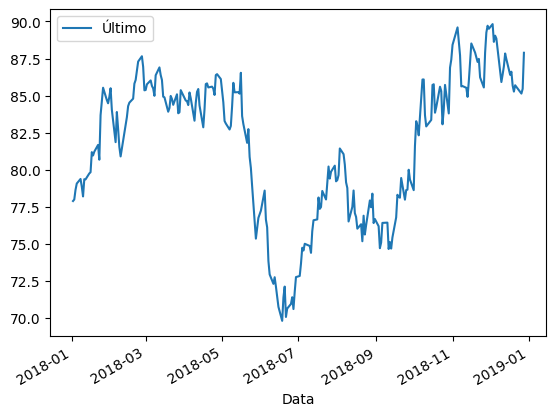

In [642]:
datetime_filter = date(2019, 12, 31)
df = df_bovespa.loc[df_bovespa['Data'].dt.year == 2018]
df.plot(x='Data', y='Último')

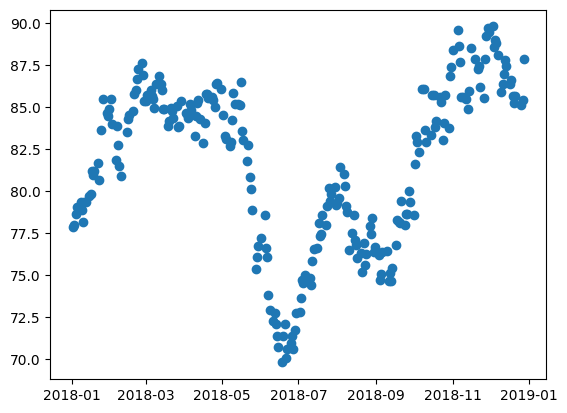

In [643]:
plt.scatter(x=df['Data'], y=df['Último'])

In [644]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2018-12-28 to 2018-01-02
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        245 non-null    datetime64[ns]
 1   Último      245 non-null    float64       
 2   Abertura    245 non-null    float64       
 3   Máxima      245 non-null    float64       
 4   Mínima      245 non-null    float64       
 5   Vol.        245 non-null    float64       
 6   Var%        245 non-null    float64       
 7   dia_semana  245 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 17.2 KB


In [646]:
df_2018 = df['Último']
df_2018.head()

Data
2018-12-28    87.887
2018-12-27    85.460
2018-12-26    85.136
2018-12-21    85.697
2018-12-20    85.269
Name: Último, dtype: float64

In [647]:
df_2018.sort_index(inplace=True)

<ipython-input-647-5c3f7409bb29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.sort_index(inplace=True)


In [648]:
df_result_2018 = seasonal_decompose(df_2018, period=1)

<Axes: xlabel='Data'>

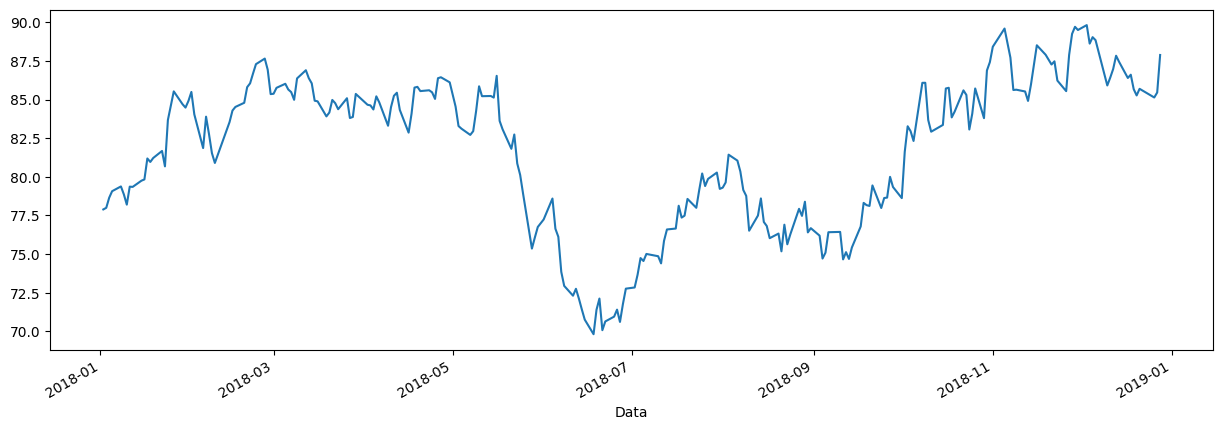

In [649]:
fig, ax = plt.subplots(figsize=(15,5))

df_result_2018.observed.plot(ax=ax)

<Axes: xlabel='Data'>

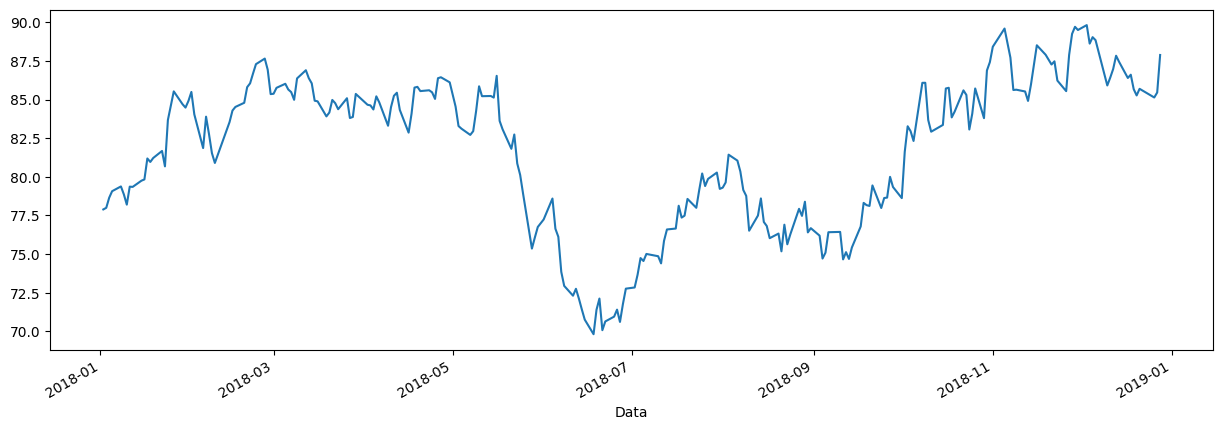

In [650]:
fig, ax = plt.subplots(figsize=(15,5))

df_result_2018.trend.plot(ax=ax)

<Axes: xlabel='Data'>

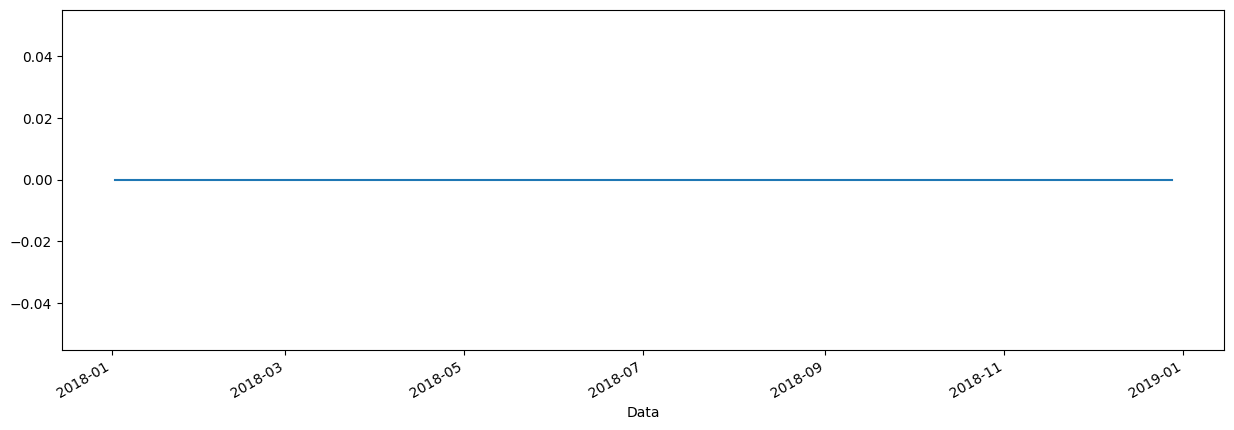

In [651]:
fig, ax = plt.subplots(figsize=(15,5))

df_result_2018.seasonal.plot(ax=ax)

<Axes: xlabel='Data'>

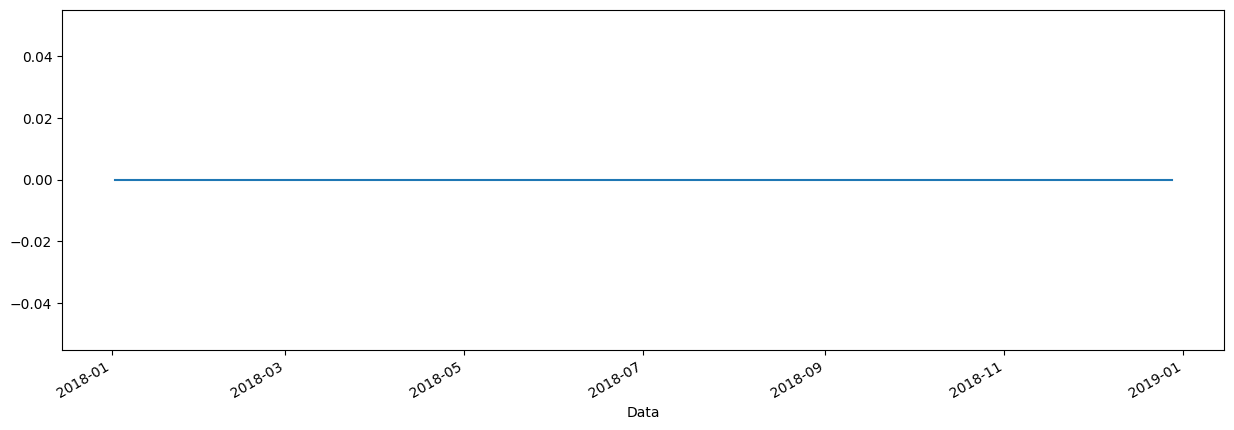

In [652]:
fig, ax = plt.subplots(figsize=(15,5))

df_result_2018.resid.plot(ax=ax)

In [653]:
from statsmodels.tsa.stattools import adfuller

In [654]:
x = df_2018.values

In [655]:
result_adfuller = adfuller(x)
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [656]:
print(result_adfuller)

(-1.3742460181412195, 0.5945587466092882, 2, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 709.0707728541123)


In [657]:
print(f'Teste estatisco - {result_adfuller[0]}')
print(f'P-value - {result_adfuller[1]}')
print(f'Teste estatisco - {result_adfuller[4]}')

Teste estatisco - -1.3742460181412195
P-value - 0.5945587466092882
Teste estatisco - {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}


In [658]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
ma = df_2018.rolling(5).mean()
ma

Data
2018-01-02        NaN
2018-01-03        NaN
2018-01-04        NaN
2018-01-05        NaN
2018-01-08    78.5966
               ...   
2018-12-20    86.2806
2018-12-21    85.9300
2018-12-26    85.6772
2018-12-27    85.4472
2018-12-28    85.8898
Name: Último, Length: 245, dtype: float64

<Axes: xlabel='Data'>

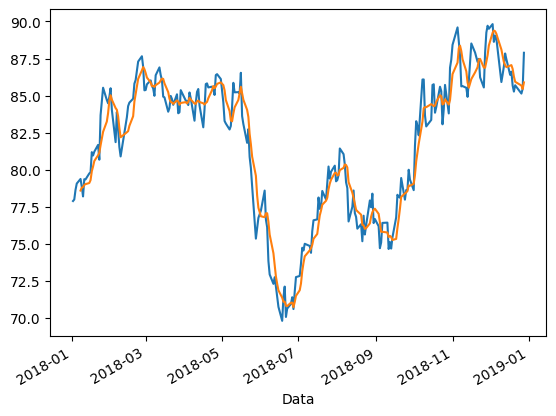

In [659]:
fig, ax = plt.subplots()
df_2018.plot(ax=ax)
ma.plot(ax=ax)

In [660]:
import numpy as np

In [661]:
df_2018_log = np.log(df_2018)
df_2018_log

Data
2018-01-02    4.355310
2018-01-03    4.356645
2018-01-04    4.364969
2018-01-05    4.370346
2018-01-08    4.374234
                ...   
2018-12-20    4.445811
2018-12-21    4.450818
2018-12-26    4.444250
2018-12-27    4.448048
2018-12-28    4.476052
Name: Último, Length: 245, dtype: float64

In [662]:
ma_log = np.log(df_2018_log.rolling(5).mean())
ma_log

Data
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08    1.473458
                ...   
2018-12-20    1.494603
2018-12-21    1.493694
2018-12-26    1.493032
2018-12-27    1.492431
2018-12-28    1.493577
Name: Último, Length: 245, dtype: float64

<Axes: xlabel='Data'>

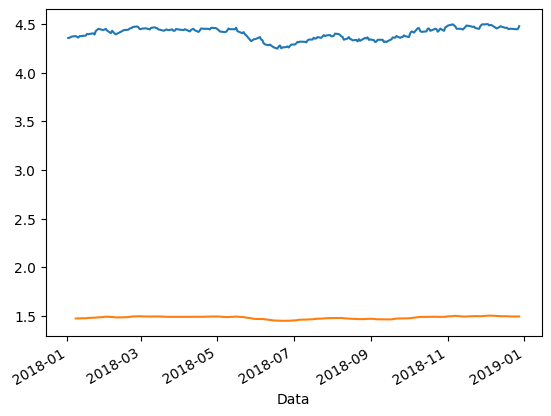

In [663]:
fig,ax =  plt.subplots()

df_2018_log.plot(ax=ax)
ma_log.plot(ax=ax)

In [664]:
df_s = (df_2018_log - ma_log).dropna()
df_s

Data
2018-01-08    2.900776
2018-01-09    2.893698
2018-01-10    2.885135
2018-01-11    2.899494
2018-01-12    2.899132
                ...   
2018-12-20    2.951208
2018-12-21    2.957124
2018-12-26    2.951218
2018-12-27    2.955617
2018-12-28    2.982475
Name: Último, Length: 241, dtype: float64

In [665]:
ma_s = df_s.rolling(5).std()
ma_s

Data
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12    0.006472
                ...   
2018-12-20    0.009250
2018-12-21    0.005583
2018-12-26    0.005620
2018-12-27    0.002659
2018-12-28    0.013095
Name: Último, Length: 241, dtype: float64

In [666]:
std = df_s.rolling(5).std()
std

Data
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12    0.006472
                ...   
2018-12-20    0.009250
2018-12-21    0.005583
2018-12-26    0.005620
2018-12-27    0.002659
2018-12-28    0.013095
Name: Último, Length: 241, dtype: float64

<Axes: xlabel='Data'>

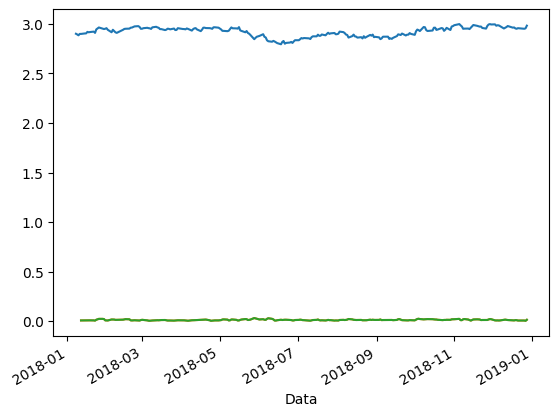

In [667]:
fig,ax = plt.subplots()

df_s.plot(ax=ax)
ma_s.plot(ax=ax)
std.plot(ax=ax)

In [668]:
x_s = df_s.values
result_s = adfuller(x_s)

print(f'Teste estatisco - {result_s[0]}')
print(f'P-value - {result_s[1]}')
print(f'Teste estatisco - {result_s[4]}')

Teste estatisco - -1.6009949568619584
P-value - 0.48309365005501076
Teste estatisco - {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}


In [669]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(5).mean()
std_diff = df_diff.rolling(5).std()

<Axes: xlabel='Data'>

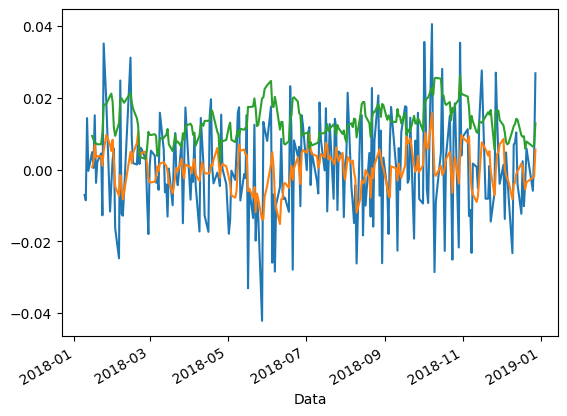

In [670]:
fig, ax = plt.subplots()

df_diff.plot(ax=ax)
ma_diff.plot(ax=ax)
std_diff.plot(ax=ax)

In [671]:
x_diff = df_diff.dropna().values
x_diff

array([-7.07774628e-03, -8.56321552e-03,  1.43589345e-02, -3.62264884e-04,
        4.85143753e-03,  4.44527759e-04,  1.51419460e-02, -3.69721345e-03,
        2.10677996e-03,  4.50139159e-03, -1.27617189e-02,  3.51601961e-02,
        1.93884287e-02, -1.16852993e-02, -4.08074537e-03,  2.78077291e-03,
        5.86428816e-03, -1.63617002e-02, -2.47460497e-02,  2.48465983e-02,
       -1.23686537e-02, -1.28751684e-02, -6.07942751e-03,  3.12378210e-02,
        8.69969398e-03,  1.82036891e-03,  1.39249677e-03,  9.19625037e-03,
        1.55346843e-03,  6.08043751e-03,  5.53048519e-03,  2.62768135e-03,
       -8.81186141e-03, -1.79885204e-02,  9.62648686e-04,  5.27014307e-03,
        3.89305872e-03, -3.64297993e-03, -2.04342344e-03, -5.64709314e-03,
        1.58586685e-02,  5.65037442e-03, -6.33717952e-03, -4.15909865e-03,
       -1.31061904e-02,  2.84082500e-04, -9.95619471e-03,  4.15876632e-03,
        1.01792438e-02, -2.37752656e-03, -4.35213903e-03,  7.76442568e-03,
       -1.49665400e-02,  

In [672]:
result_diff = adfuller(x_diff)

In [673]:
print(f'Teste estatisco - {result_diff[0]}')
print(f'P-value - {result_diff[1]}')
print(f'Teste estatisco - {result_diff[4]}')

Teste estatisco - -13.262016811389604
P-value - 8.361412596769286e-25
Teste estatisco - {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}


In [674]:
from statsmodels.tsa.stattools import acf, pacf

In [675]:
lag_acf = acf(df_diff.dropna(), nlags=20) # pode alterar de acordo com a necessidade o nlags
lag_pacf = pacf(df_diff.dropna(), nlags=20)

In [676]:
# 5% ACF
# 1.96 / sqrt(N - d) -> N
# N = Numero de pontos no df
# d = Numero de vezes que diferencia o df
# Estatistica descritiva básica

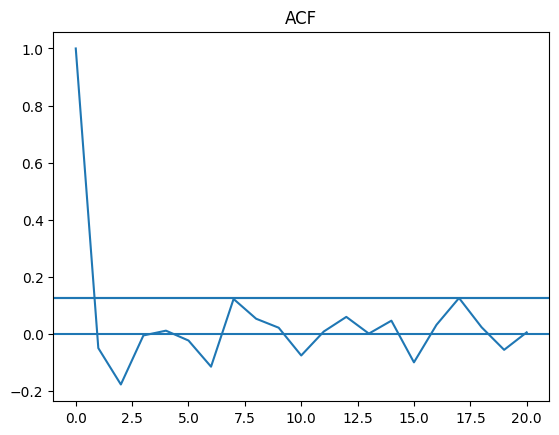

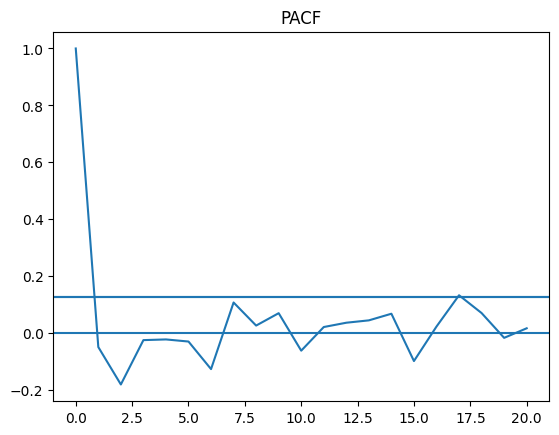

In [677]:
plt.plot(lag_acf)

plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1))
plt.axhline(y=0)
plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1))

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1))
plt.axhline(y=0)
plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1))

plt.title("PACF")
plt.show()

In [678]:
# Aula -> 4 Minuto 24:47

In [679]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

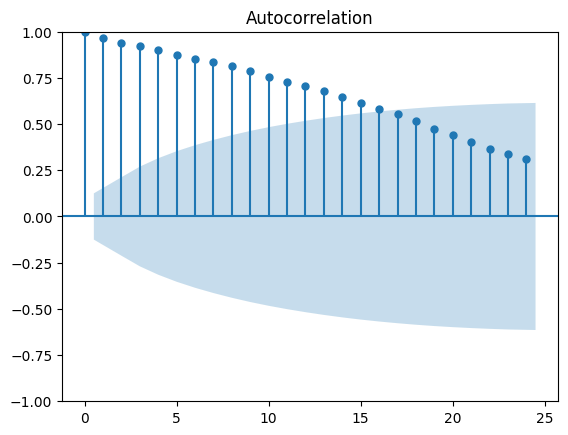

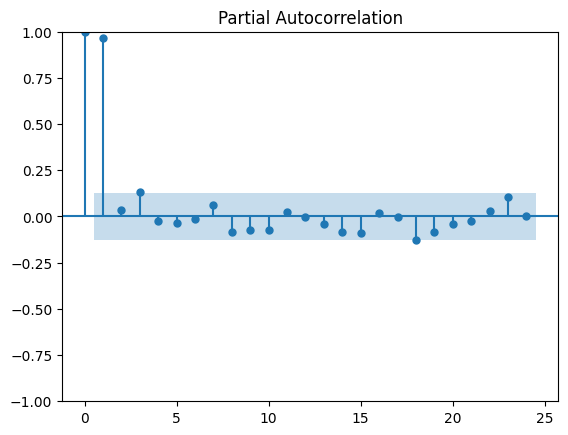

In [680]:
plot_acf(df_2018)
plot_pacf(df_2018)
plt.show()

In [681]:
df_bovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,dia_semana
Data,,,,,,,,
2023-07-28,2023-07-28,120.187,120.002,120.660,119.706,8460000.0,0.16,4
2023-07-27,2023-07-27,119.990,122.560,122.599,119.825,10680000.0,-2.10,3
2023-07-26,2023-07-26,122.560,122.003,122.747,121.370,9990000.0,0.45,2
2023-07-25,2023-07-25,122.008,121.344,123.010,121.344,11430000.0,0.55,1
2023-07-24,2023-07-24,121.342,120.220,121.772,120.099,10490000.0,0.94,0


In [682]:
df_forecast = df_bovespa.loc[(df_bovespa['Data'].dt.year == 2018) | (df_bovespa['Data'].dt.year == 2019)]
df_forecast = df_forecast[['Data', 'Último', 'Vol.']]

In [683]:
df_forecast = df_forecast[['Data', 'Último']]
df_forecast.columns = ['ds', 'y']
df_forecast.head(4)

,ds,y
Data,,
2019-12-30,2019-12-30,115.645
2019-12-27,2019-12-27,116.534
2019-12-26,2019-12-26,117.203
2019-12-23,2019-12-23,115.863


In [684]:
df_forecast.reset_index(inplace=True)
del df_forecast['Data']

In [685]:
treino = df_forecast.loc[df_forecast['ds'].dt.year == 2018]
treino['unique_id'] = 'Ibovespa'
valid = df_forecast.loc[(df_forecast['ds'] > '2019-01-01') & (df_forecast['ds'] < '2019-03-01')]
h = valid['ds'].nunique()
h

<ipython-input-685-a30082680a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['unique_id'] = 'Ibovespa'


41

In [686]:
valid.sort_values('ds', inplace=True)

<ipython-input-686-5287c8494b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.sort_values('ds', inplace=True)


In [687]:
treino

,ds,y,unique_id
248,2018-12-28,87.887,Ibovespa
249,2018-12-27,85.460,Ibovespa
250,2018-12-26,85.136,Ibovespa
251,2018-12-21,85.697,Ibovespa
252,2018-12-20,85.269,Ibovespa
...,...,...,...
488,2018-01-08,79.379,Ibovespa
489,2018-01-05,79.071,Ibovespa
490,2018-01-04,78.647,Ibovespa
491,2018-01-03,77.995,Ibovespa


In [688]:
treino.sort_values('ds', inplace=True)

<ipython-input-688-c464f51cf89a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino.sort_values('ds', inplace=True)


In [689]:
def wmape(y_true, y_pred):
  return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [690]:
wmape(10, 11)

0.1

In [717]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, AutoARIMA

In [692]:
model = StatsForecast(models=[Naive()], freq='B', n_jobs=-1)

In [693]:
model.fit(treino)

StatsForecast(models=[Naive])

In [694]:
forecast_df = model.predict(h=h, level=[90])

In [695]:
forecast_df.head()

,ds,Naive,Naive-lo-90,Naive-hi-90
unique_id,,,,
Ibovespa,2018-12-31,87.887001,86.019424,89.754578
Ibovespa,2019-01-01,87.887001,85.245850,90.528152
Ibovespa,2019-01-02,87.887001,84.652267,91.121735
Ibovespa,2019-01-03,87.887001,84.151848,91.622154
Ibovespa,2019-01-04,87.887001,83.710976,92.063026


In [696]:
forecast_df = forecast_df.reset_index().merge(valid, on=['ds'], how='left')

In [697]:
forecast_df.dropna(inplace=True)

In [698]:
forecast_df['y'].values

array([91.012, 91.564, 91.841, 91.699, 92.032, 93.613, 93.806, 93.658,
       94.474, 94.056, 94.393, 95.351, 96.097, 96.01 , 95.103, 96.558,
       97.677, 95.444, 95.639, 96.996, 97.394, 97.861, 98.589, 98.311,
       94.636, 94.406, 95.343, 94.413, 96.168, 95.842, 98.015, 97.526,
       96.51 , 97.659, 96.545, 96.932, 97.886, 97.24 ])

In [699]:
wped_forecast = wmape(forecast_df['y'].values, forecast_df['Naive'].values)

In [700]:
forecast_df[['y','Naive']]

,y,Naive
2,91.012,87.887001
3,91.564,87.887001
4,91.841,87.887001
5,91.699,87.887001
6,92.032,87.887001
7,93.613,87.887001
8,93.806,87.887001
9,93.658,87.887001
10,94.474,87.887001
11,94.056,87.887001


In [701]:
print(f'{wped_forecast:.2%}')

7.95%


In [702]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=5)], freq='B', n_jobs=-1)
model_s.fit(treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(valid, on=['ds'], how='left')
forecast_df_s.dropna(inplace=True)

In [703]:
wped_forecast_s = wmape(forecast_df_s['y'].values, forecast_df_s['SeasonalNaive'].values)
print(f'{wped_forecast_s:.2%}')

10.10%


In [704]:
df_bovespa.loc[df_bovespa['Data'].dt.year == 2018].head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,dia_semana
Data,,,,,,,,
2018-12-28,2018-12-28,87.887,85.469,88.044,85.469,3760000.0,2.84,4
2018-12-27,2018-12-27,85.460,85.141,85.739,84.876,3940000.0,0.38,3
2018-12-26,2018-12-26,85.136,85.684,85.684,83.892,3460000.0,-0.65,2
2018-12-21,2018-12-21,85.697,85.269,86.554,85.134,6260000.0,0.50,4
2018-12-20,2018-12-20,85.269,85.678,86.584,84.756,6290000.0,-0.47,3


In [705]:
wmape(91, 85)

0.06593406593406594

In [706]:
df_treino = treino[['y','ds']]
df_treino.index = df_treino['ds']

In [707]:
del df_treino['ds']

In [708]:
df_treino_decompose = seasonal_decompose(df_treino, period=1)
df_treino_decompose

<Axes: xlabel='ds'>

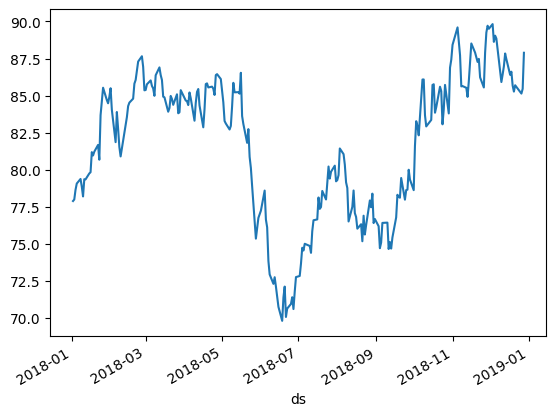

In [709]:
df_treino_decompose.trend.plot()

<Axes: xlabel='ds'>

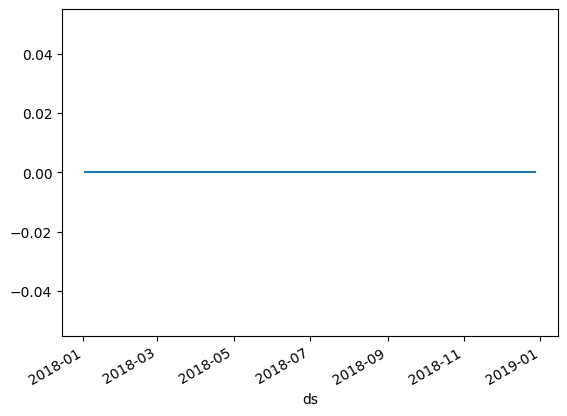

In [710]:
df_treino_decompose.resid.plot()

In [716]:
forecast_df_s[['y','SeasonalNaive','ds']].head()

,y,SeasonalNaive,ds
2,91.012,85.136002,2019-01-02
3,91.564,85.459999,2019-01-03
4,91.841,87.887001,2019-01-04
5,91.699,85.268997,2019-01-07
6,92.032,85.696999,2019-01-08


In [712]:
forecast_df_s.head()

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
2,Ibovespa,2019-01-02,85.136002,73.667000,96.605003,91.012
3,Ibovespa,2019-01-03,85.459999,73.990997,96.929001,91.564
4,Ibovespa,2019-01-04,87.887001,76.417999,99.356003,91.841
5,Ibovespa,2019-01-07,85.268997,73.799995,96.737999,91.699
6,Ibovespa,2019-01-08,85.696999,74.227997,97.166000,92.032


In [713]:
treino.head()

,ds,y,unique_id
492,2018-01-02,77.891,Ibovespa
491,2018-01-03,77.995,Ibovespa
490,2018-01-04,78.647,Ibovespa
489,2018-01-05,79.071,Ibovespa
488,2018-01-08,79.379,Ibovespa


In [714]:
model_s

StatsForecast(models=[SeasonalNaive])

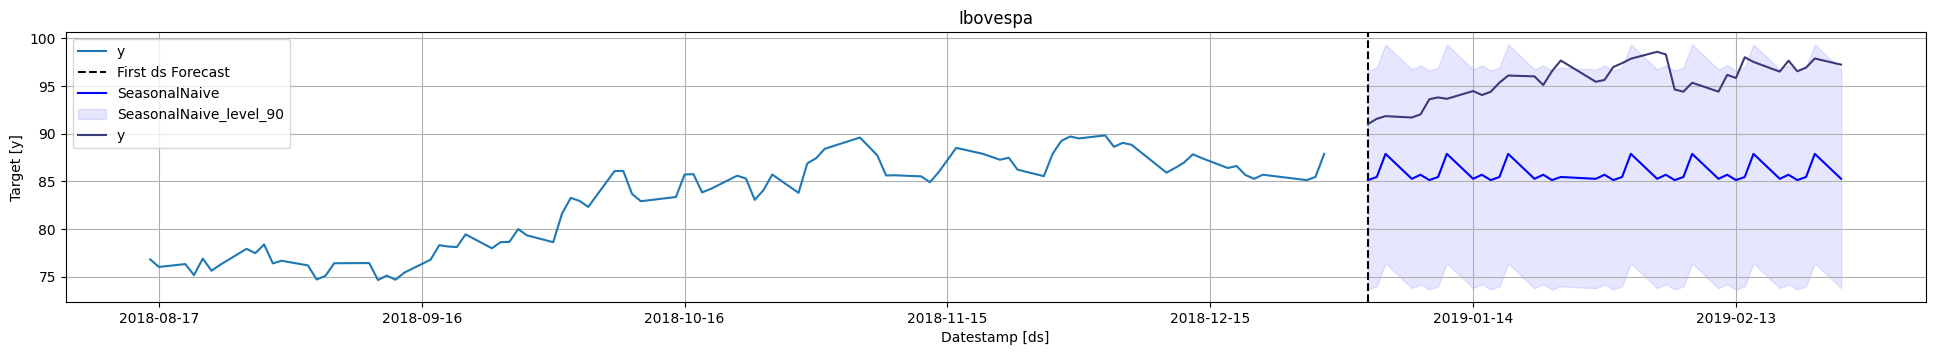

In [715]:
model_s.plot(treino, forecast_df_s, level=[90], unique_ids=['Ibovespa'], engine='matplotlib', max_insample_length=90)

In [731]:
model_arima = StatsForecast(models=[AutoARIMA(season_length=5)], freq='D', n_jobs=-1)
model_arima.fit(treino)

forecast_df_arima = model_arima.predict(h=h, level=[90])
forecast_df_arima = forecast_df_arima.reset_index().merge(valid, on=['ds'], how='left')
forecast_df_arima.dropna(inplace=True)

In [732]:
forecast_df_arima.head(10)

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,y
4,Ibovespa,2019-01-02,87.887001,83.702347,92.071648,91.012
5,Ibovespa,2019-01-03,87.887001,83.302940,92.471054,91.564
6,Ibovespa,2019-01-04,87.887001,82.935654,92.838348,91.841
9,Ibovespa,2019-01-07,87.887001,81.969009,93.804993,91.699
10,Ibovespa,2019-01-08,87.887001,81.680161,94.093842,92.032
11,Ibovespa,2019-01-09,87.887001,81.404167,94.369835,93.613
12,Ibovespa,2019-01-10,87.887001,81.139450,94.634544,93.806
13,Ibovespa,2019-01-11,87.887001,80.884743,94.889259,93.658
16,Ibovespa,2019-01-14,87.887001,80.170883,95.603119,94.474
17,Ibovespa,2019-01-15,87.887001,79.947182,95.826820,94.056


In [733]:
wmape_arima = wmape(forecast_df_arima['y'].values, forecast_df_arima['AutoARIMA'].values)
print(f'{wmape_arima:.2%}')

7.42%


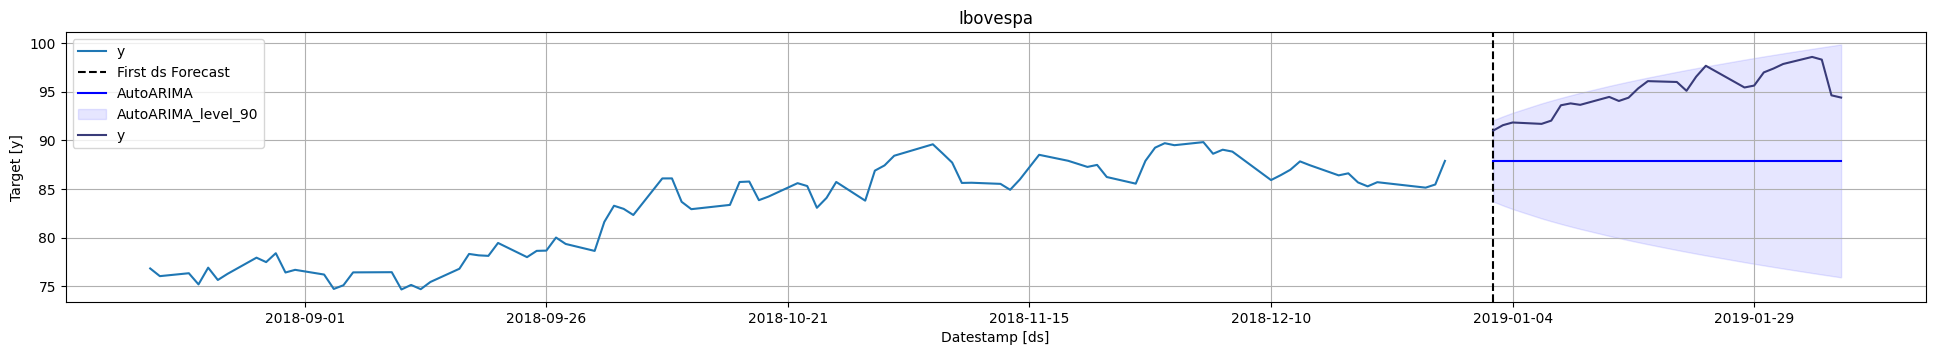

In [734]:
model_arima.plot(treino, forecast_df_arima, level=[90], unique_ids=['Ibovespa'], engine='matplotlib', max_insample_length=90)

Modelos a serem estudados:

*   autorregressivos (AR)
*   modelos de média móvel (MA)
*   modelosautorregressivos integrados de média móvel (ARIMA)





**Tech challenge**

Montar um modelo preditivo com dados da ibovespa para criar uma serie temporal e prever diariamente o fechamento da base.

**Demonstrar**

1. O modelo com o storytelling, desde a captura do dado até a entrega do modelo
2. Justificar a técnica utilizada
3. Atingir uma acuracia de 70%

<>

<h3>Aula 1</h3>

Encontrar conceito de sazonalidade, tendência e residuo.

Tendêcia = Direção da série
Sazonalidade = recorrencia das oscilações
Residuo = o que sobra do sinal

Prencher as lacunas das datas criando um valor para o último valor fechado

Estacionaridade - entender variancia e covariancia